## Objective
Desarrollar un análisis completo y un modelo predictivo para los precios de viviendas en Barcelona, utilizando datos extraídos del portal Fotocasa. El objetivo es aplicar técnicas de extracción, manipulación y análisis de datos, así como algoritmos de Machine Learning, para predecir los precios de las viviendas en función de diversas características.

## Data Description
- **price**: The price of the real-state.
- **rooms**: Number of rooms.
- **bathroom**: Number of bathrooms.
- **lift**: whether a building has an elevator (also known as a lift in some regions) or not
- **terrace**: If it has a terrace or not.
- **square_meters**: Number of square meters.
- **real_state**: Kind of real-state.
- **neighborhood**: Neighborhood
- **square_meters_price**: Price of the square meter.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
df=pd.read_csv('Barcelona_Fotocasa_HousingPrices.csv')
df_copia =df.copy
df_train = pd.read_csv('Barcelona_Fotocasa_HousingPrices.csv')
df_test = pd.read_csv('Barcelona_Fotocasa_HousingPrices.csv')

In [3]:
df.head()

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


In [5]:
df.describe()

,Unnamed: 0,price,rooms,bathroom,square_meters,square_meters_price
count,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000,8188.000000
mean,4093.500000,1444.092574,2.420738,1.508793,84.610161,17.739121
std,2363.816335,1125.886215,1.138592,0.732798,47.874028,9.245241
min,0.000000,320.000000,0.000000,1.000000,10.000000,4.910714
25%,2046.750000,875.000000,2.000000,1.000000,56.000000,12.790698
50%,4093.500000,1100.000000,2.000000,1.000000,73.000000,15.306122
75%,6140.250000,1540.000000,3.000000,2.000000,95.000000,19.444444
max,8187.000000,15000.000000,10.000000,8.000000,679.000000,186.666667


# Exploratory Data Analysis (EDA)

#### DATA CLEANING

In [6]:
# Info about columns and nulls
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8188 non-null   int64  
 1   price                8188 non-null   int64  
 2   rooms                8188 non-null   int64  
 3   bathroom             8188 non-null   int64  
 4   lift                 8188 non-null   bool   
 5   terrace              8188 non-null   bool   
 6   square_meters        8188 non-null   int64  
 7   real_state           7920 non-null   object 
 8   neighborhood         8188 non-null   object 
 9   square_meters_price  8188 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 527.9+ KB


Unnamed: 0               0
price                    0
rooms                    0
bathroom                 0
lift                     0
terrace                  0
square_meters            0
real_state             268
neighborhood             0
square_meters_price      0
dtype: int64

MODIFICAMOS LOS **VALORES NULOS**

In [7]:
df.real_state.value_counts()

real_state
flat         6505
apartment     991
attic         315
study         109
Name: count, dtype: int64

In [8]:
# Modificamos los nulos por 'unknown' ya que es una información relevante.
df['real_state'].fillna('unknown', inplace=True)

C:\Users\guill\AppData\Local\Temp\ipykernel_1480\4073010071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['real_state'].fillna('unknown', inplace=True)


In [9]:
df['real_state'].value_counts()

real_state
flat         6505
apartment     991
attic         315
unknown       268
study         109
Name: count, dtype: int64

REVISIÓN Y CORRECCIÓN DE ELEMENTOS DUPLICADOS

In [10]:
df.duplicated().sum()

0

VISUALIZACIÓN DE LAS DISTRIBUCIONES

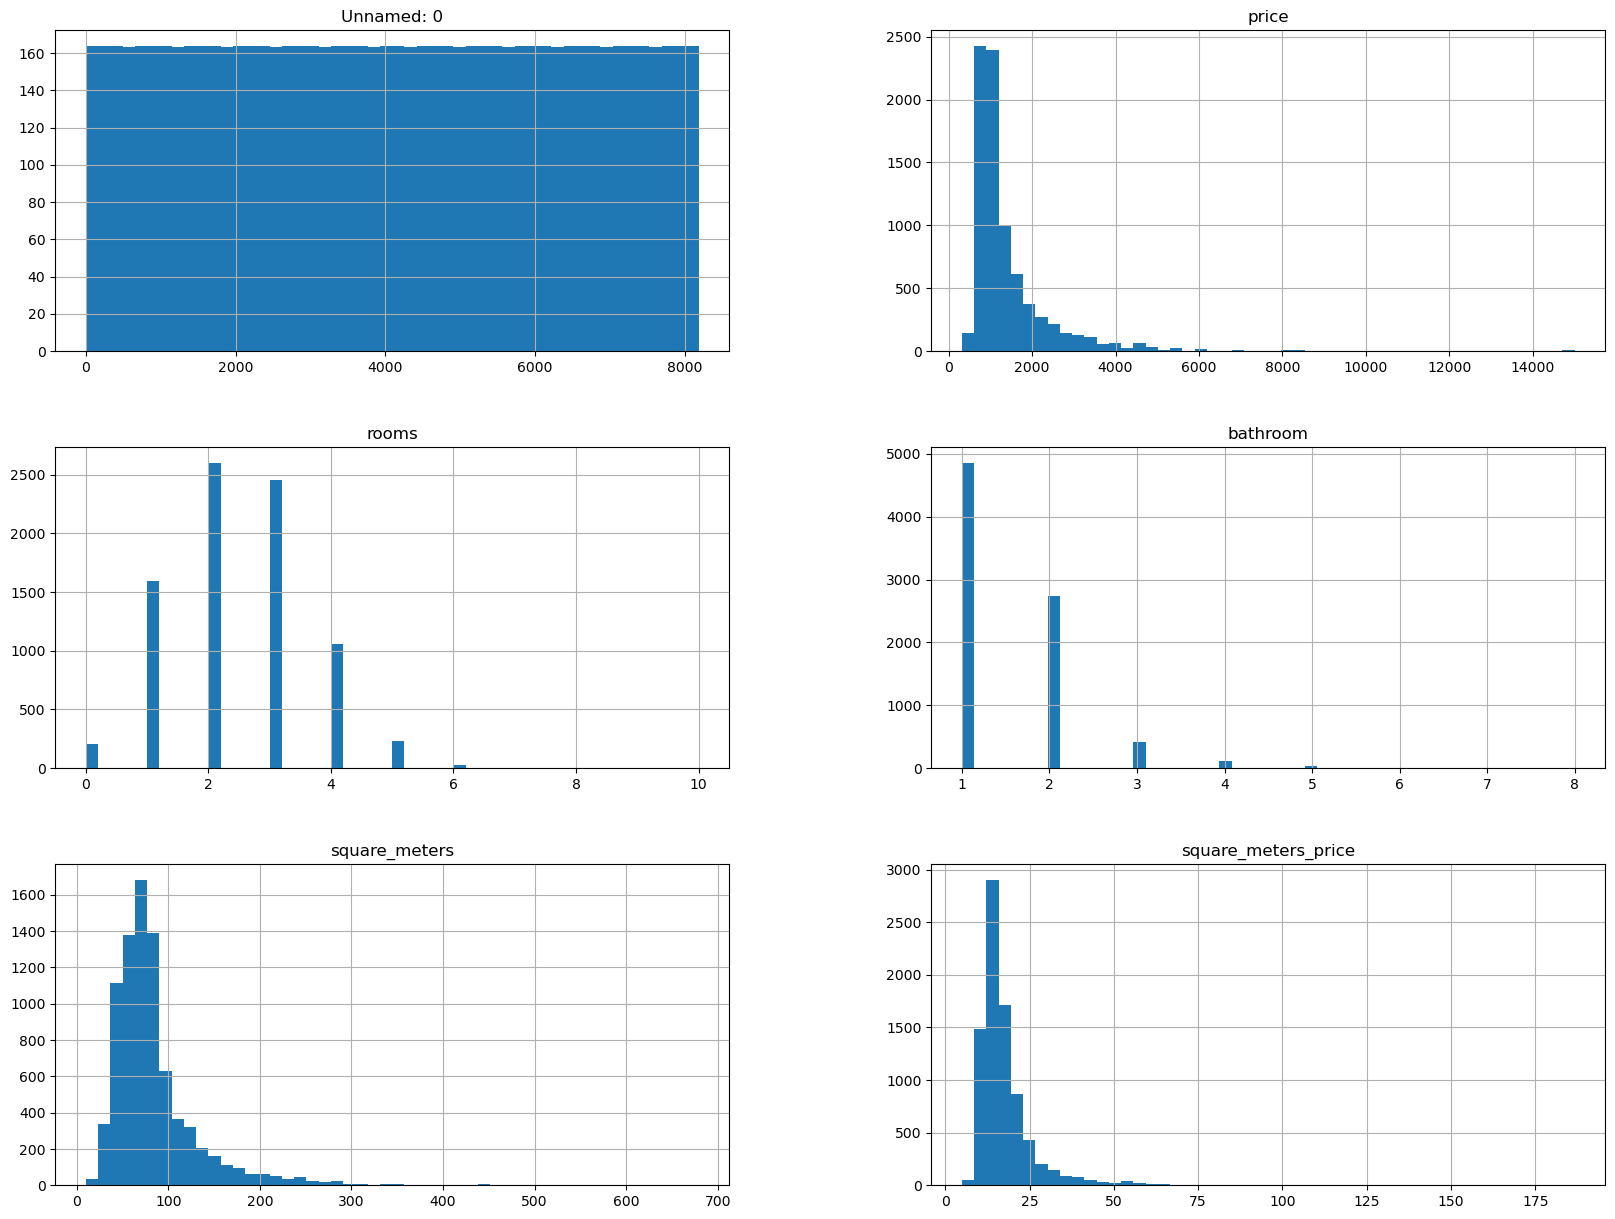

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

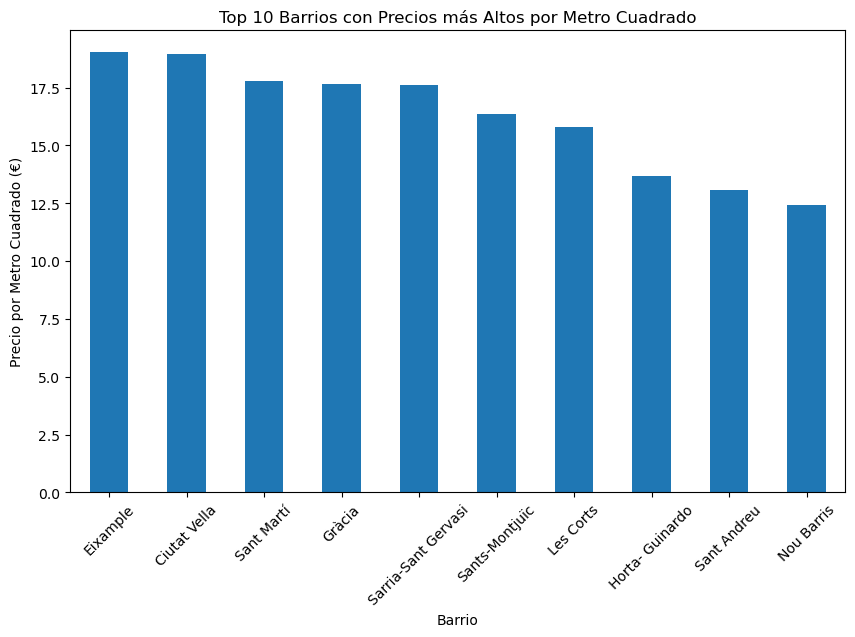

In [12]:
neighborhood_prices = df.groupby('neighborhood')['square_meters_price'].mean().sort_values(ascending=False)

# Graficar los precios por metro cuadrado de los 10 barrios con precios más altos
neighborhood_prices.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Barrios con Precios más Altos por Metro Cuadrado')
plt.xlabel('Barrio')
plt.ylabel('Precio por Metro Cuadrado (€)')
plt.xticks(rotation=45)
plt.show()


In [13]:
neighborhood_prices = df.groupby('neighborhood')['square_meters_price'].mean().sort_values(ascending=False)

# Obtener y mostrar los barrios con los precios más bajos
neighborhood_prices_bottom = neighborhood_prices.tail(10)

print(neighborhood_prices_bottom)

neighborhood
Eixample               19.018949
Ciutat Vella           18.971385
Sant Martí             17.791161
Gràcia                 17.634875
Sarria-Sant Gervasi    17.631267
Sants-Montjuïc         16.344102
Les Corts              15.785693
Horta- Guinardo        13.662580
Sant Andreu            13.093919
Nou Barris             12.413576
Name: square_meters_price, dtype: float64


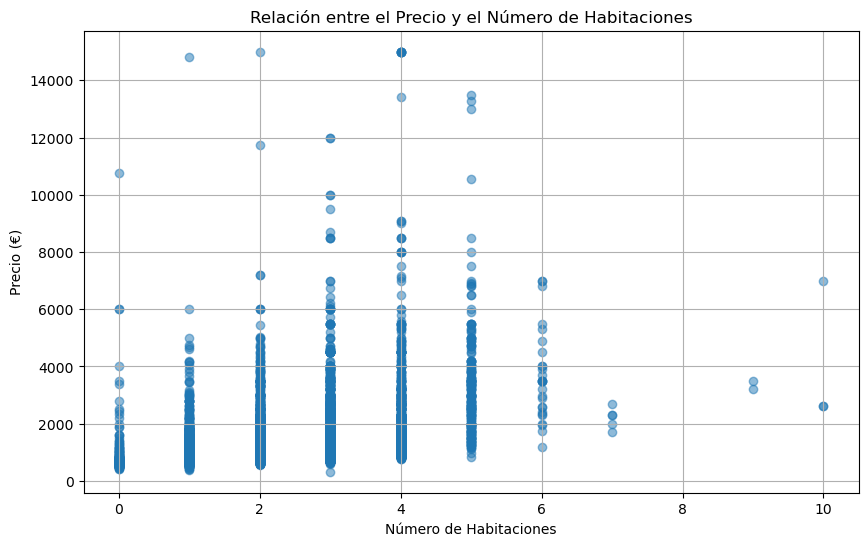

In [14]:
# Graficar la relación entre el precio y el número de habitaciones
plt.figure(figsize=(10, 6))
plt.scatter(df['rooms'], df['price'], alpha=0.5)
plt.title('Relación entre el Precio y el Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

Se observa una tendencia general de aumento en el precio a medida que incrementa el número de habitaciones, aunque hay variabilidad considerable, especialmente en propiedades con más habitaciones.

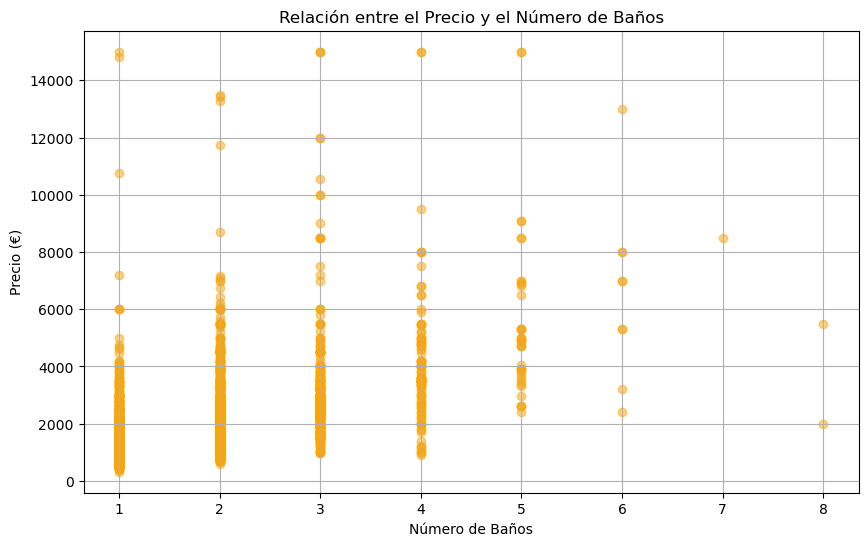

In [15]:
# Graficar la relación entre el precio y el número de baños
plt.figure(figsize=(10, 6))
plt.scatter(df['bathroom'], df['price'], alpha=0.5, color='orange')
plt.title('Relación entre el Precio y el Número de Baños')
plt.xlabel('Número de Baños')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

Se observa que, en general, a medida que aumenta el número de baños, también tiende a aumentar el precio de las propiedades. 

Sin embargo, hay bastante variabilidad, especialmente en las propiedades con más de dos baños, lo que indica que otros factores también influyen en el precio.

<Figure size 800x500 with 0 Axes>

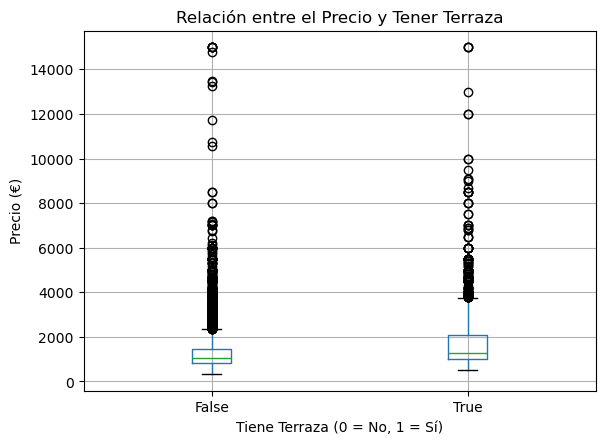

0.17421582586439352

In [16]:
# Calcular la correlación entre tener terraza y el precio
terrace_price_correlation = df['terrace'].astype(int).corr(df['price'])

# Graficar la relación entre tener terraza y el precio
plt.figure(figsize=(8, 5))
df.boxplot(column='price', by='terrace')
plt.title('Relación entre el Precio y Tener Terraza')
plt.suptitle('')  # Eliminar el título superpuesto por defecto del boxplot
plt.xlabel('Tiene Terraza (0 = No, 1 = Sí)')
plt.ylabel('Precio (€)')
plt.show()

terrace_price_correlation


La correlación entre tener una terraza y el precio de las propiedades es de aproximadamente 0.17, lo que indica una correlación positiva pero débil. 

Esto sugiere que las propiedades con terraza tienden a ser un poco más caras en promedio, pero la presencia de una terraza no es un factor decisivo en el precio.

<Figure size 800x500 with 0 Axes>

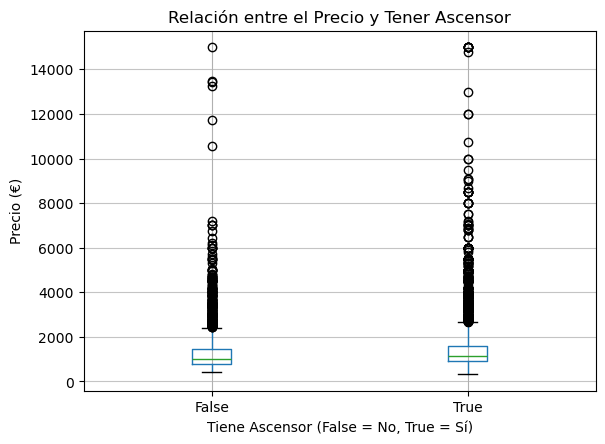

lift
False    1334.815577
True     1491.516112
Name: price, dtype: float64


In [17]:
# Calcular la media de precios para propiedades con y sin ascensor
price_by_lift = df.groupby('lift')['price'].mean()

# Graficar la relación entre tener ascensor y el precio
plt.figure(figsize=(8, 5))
df.boxplot(column='price', by='lift')
plt.title('Relación entre el Precio y Tener Ascensor')
plt.suptitle('')  # Eliminar el título superpuesto por defecto del boxplot
plt.xlabel('Tiene Ascensor (False = No, True = Sí)')
plt.ylabel('Precio (€)')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Mostrar los precios promedios por presencia de ascensor
print(price_by_lift)

La media de precios para las propiedades muestra que:

- Propiedades sin ascensor: Precio promedio de aproximadamente 1,335 €.
- Propiedades con ascensor: Precio promedio de aproximadamente 1,492 €.
- Esto sugiere que las propiedades con ascensor tienen precios, en promedio, ligeramente más altos. 
- El gráfico de caja también confirma que hay una diferencia, aunque no es extremadamente pronunciada.

<Figure size 1200x600 with 0 Axes>

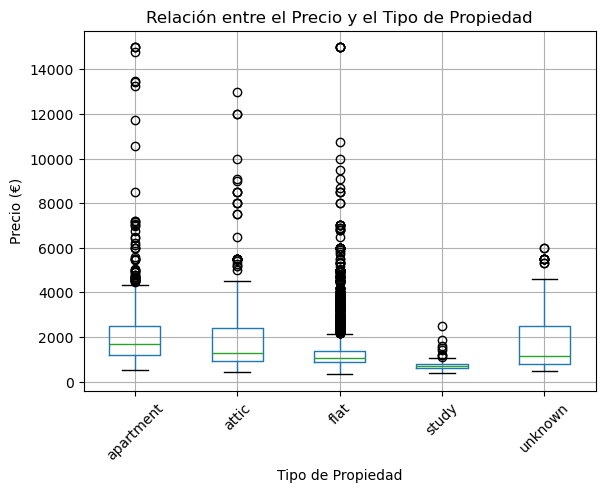

real_state
apartment    2086.387487
attic        2066.742857
unknown      1715.902985
flat         1316.758032
study         735.990826
Name: price, dtype: float64


In [18]:
# Graficar la relación entre el tipo de propiedad y el precio
plt.figure(figsize=(12, 6))
df.boxplot(column='price', by='real_state')
plt.title('Relación entre el Precio y el Tipo de Propiedad')
plt.suptitle('')  # Eliminar el título superpuesto por defecto del boxplot
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.show()

# Calcular el precio promedio por tipo de propiedad
price_by_type = df.groupby('real_state')['price'].mean().sort_values(ascending=False)

# Mostrar los precios promedios por tipo de propiedad
print(price_by_type)

La variación en los precios según el tipo de propiedad muestra que:

- Apartamentos y áticos son los más caros, con precios promedio alrededor de **2,086 €** y **2,067 €** respectivamente.
- Pisos tienen un precio promedio más bajo, en torno a **1,317 €**.
- Estudios son los más económicos, con un precio promedio de aproximadamente **736 €**.

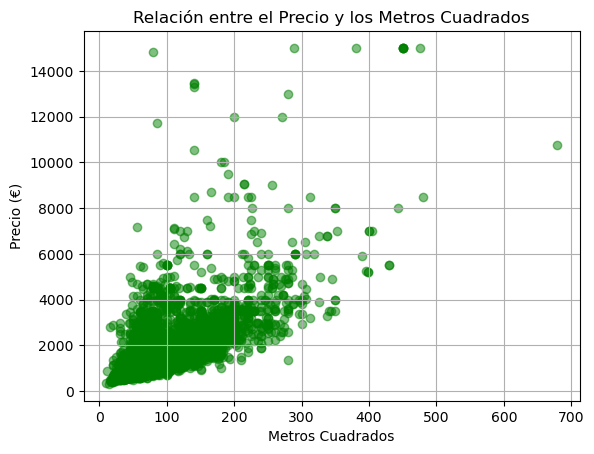

In [19]:
plt.scatter(df['square_meters'], df['price'], alpha=0.5, color='green')
plt.title('Relación entre el Precio y los Metros Cuadrados')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

Se observa una tendencia clara: a medida que aumentan los metros cuadrados, el precio de las propiedades también incrementa. 

Sin embargo, hay una gran dispersión, especialmente en las propiedades más grandes, lo que sugiere que otros factores adicionales también influyen en el precio.

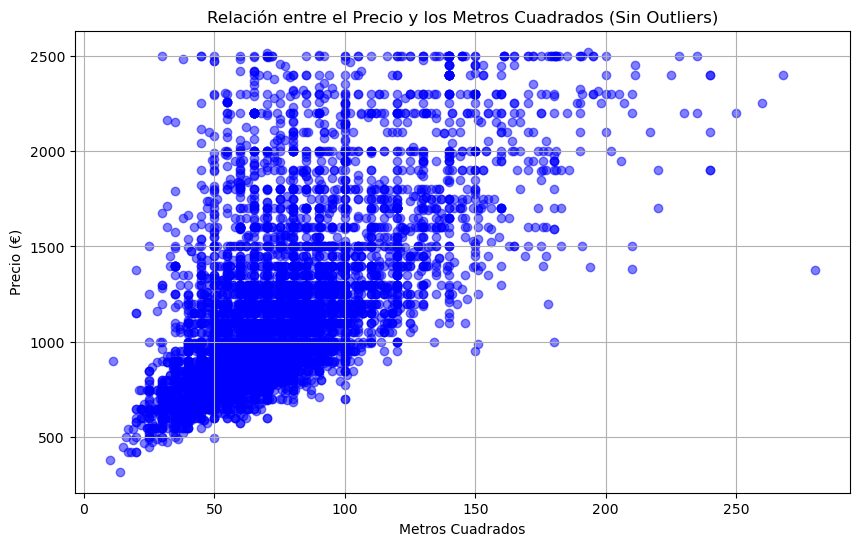

In [20]:
# Usar el rango intercuartílico (IQR) para detectar outliers en el precio
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar los outliers del dataset
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Graficar la relación entre el precio y los metros cuadrados sin outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['square_meters'], df_clean['price'], alpha=0.5, color='blue')
plt.title('Relación entre el Precio y los Metros Cuadrados (Sin Outliers)')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio (€)')
plt.grid(True)
plt.show()

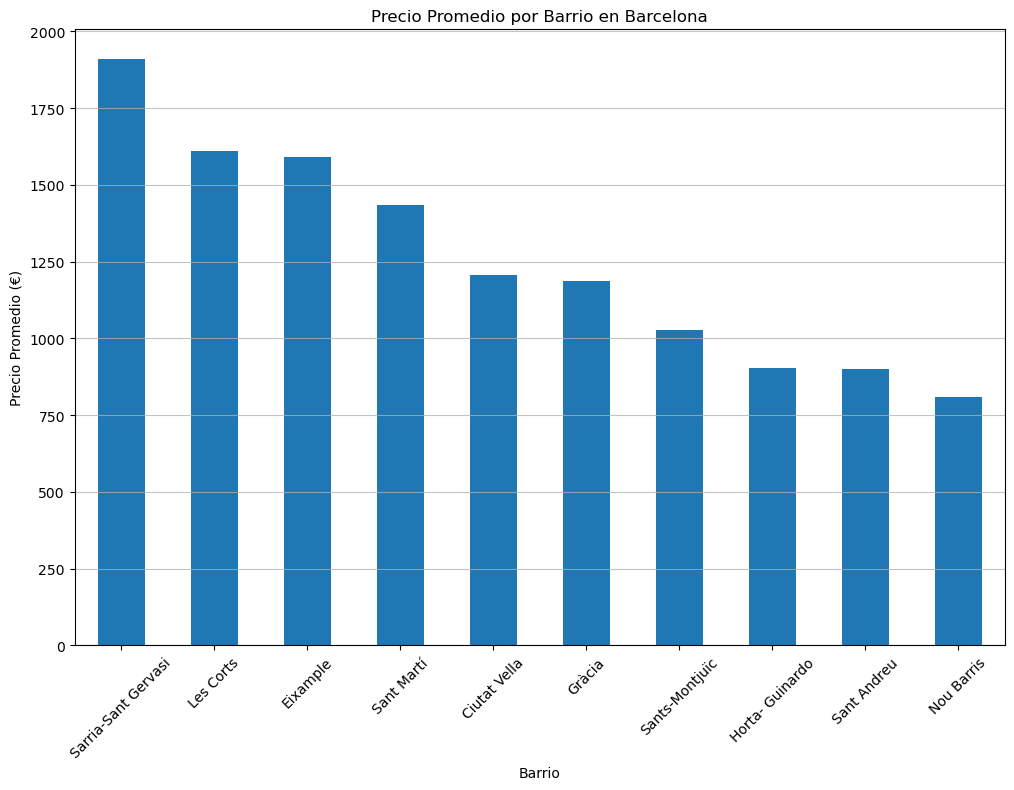

In [21]:
# Calcular la media de precios por barrio
price_by_neighborhood = df.groupby('neighborhood')['price'].mean()

# Graficar la media de precios por barrio
plt.figure(figsize=(12, 8))
price_by_neighborhood.sort_values(ascending=False).plot(kind='bar')
plt.title('Precio Promedio por Barrio en Barcelona')
plt.xlabel('Barrio')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

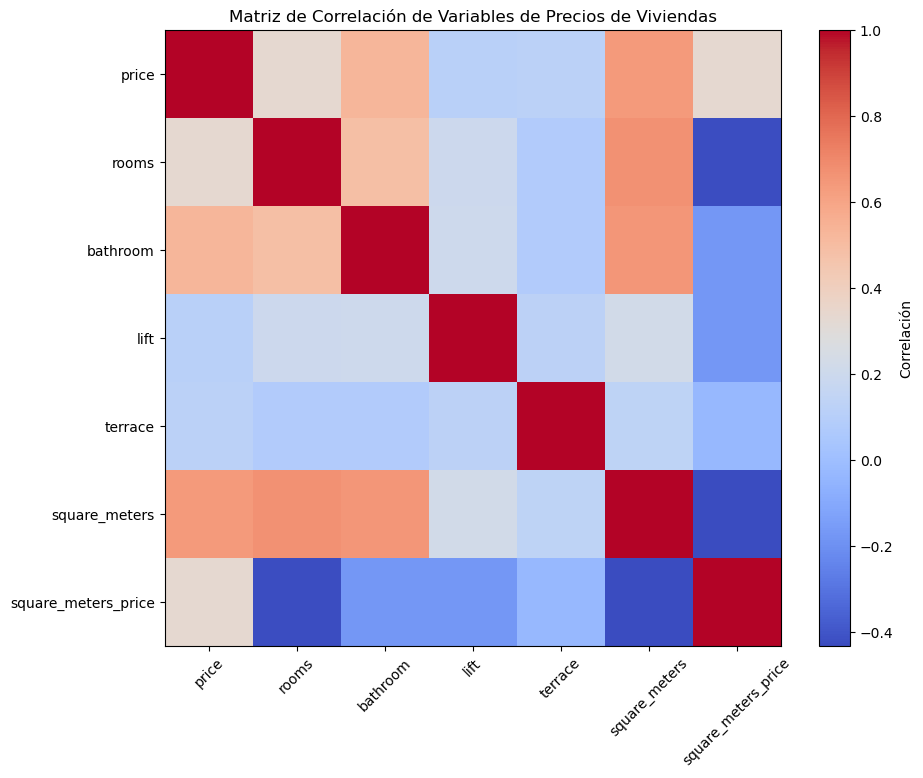

                        price     rooms  bathroom      lift   terrace  \
price                1.000000  0.333881  0.527235  0.112673  0.120064   
rooms                0.333881  1.000000  0.488114  0.195490  0.078422   
bathroom             0.527235  0.488114  1.000000  0.204658  0.080205   
lift                 0.112673  0.195490  0.204658  1.000000  0.125961   
terrace              0.120064  0.078422  0.080205  0.125961  1.000000   
square_meters        0.637481  0.664892  0.652696  0.227143  0.136830   
square_meters_price  0.333769 -0.426842 -0.174498 -0.171546 -0.034645   

                     square_meters  square_meters_price  
price                     0.637481             0.333769  
rooms                     0.664892            -0.426842  
bathroom                  0.652696            -0.174498  
lift                      0.227143            -0.171546  
terrace                   0.136830            -0.034645  
square_meters             1.000000            -0.432961  
square_me

In [22]:
# Calcular la matriz de correlación para las columnas relevantes del dataset
correlation_matrix = df_clean[['price', 'rooms', 'bathroom', 'lift', 'terrace', 'square_meters', 'square_meters_price']].corr()

# Graficar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlación')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriz de Correlación de Variables de Precios de Viviendas')
plt.show()

# Mostrar la matriz de correlación
print(correlation_matrix)

La matriz de correlación muestra las relaciones entre las variables del dataset.

- Precio y Metros Cuadrados: Correlación positiva fuerte (0.69), lo que indica que a mayor tamaño, mayor precio.
- Precio y Número de Baños: Correlación positiva moderada (0.58), sugiriendo que el número de baños influye en el precio.
- Precio y Habitaciones: Correlación positiva moderada (0.35), pero menor que la de los baños.
- Presencia de Ascensor y Precio: Correlación positiva baja (0.06), lo que confirma que no es un factor determinante.
- Terraza y Precio: Correlación positiva baja (0.17), similar al ascensor.


Las correlaciones sugieren que los metros cuadrados y el número de baños son los factores más influyentes en el precio.

### Elaboración de modelos predictivos

En los archivos de la carpeta llamada "models"
- Random Forest 
- Gradient Boosting

In [ ]:
# Guardar el dataset limpio en un nuevo archivo CSV (no sobrescribe el original)
# cleaned_file_path = 'data_clean.csv'
# df_clean.to_csv(cleaned_file_path, index=False)

print(f"Dataset limpio guardado en: {cleaned_file_path}")

Dataset limpio guardado en: Barcelona_Fotocasa_HousingPrices_CLEAN.csv
